# RGB dawn simulator calibration

In [1]:
from math import exp
import matplotlib.pyplot as plt

In [15]:
DURATION = 30*60

def curve_factory(A: float, alpha: float, beta: float):
    return lambda t: A / ( 1 + exp(-alpha * 30 / DURATION * (t - DURATION * beta)))

def plot_calibration_curves(options: tuple[float, float, float, str, str, str]) -> None:
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    t = range(0, DURATION, 1)

    for (A, alpha, beta, color, label, linestyle) in options:
        curve_fcn = curve_factory(A=A, alpha=alpha, beta=beta)
        ax1.plot(t, [curve_fcn(t) for t in t], color=color, label=label, linestyle=linestyle)
        ax2.plot(t[:60*5], [curve_fcn(t) for t in t[:60*5]], color=color, label=label, linestyle=linestyle)

    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Intensity')
    ax1.legend()
    ax1.grid()

    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Intensity')
    ax2.legend()
    ax2.grid()

    plt.show()

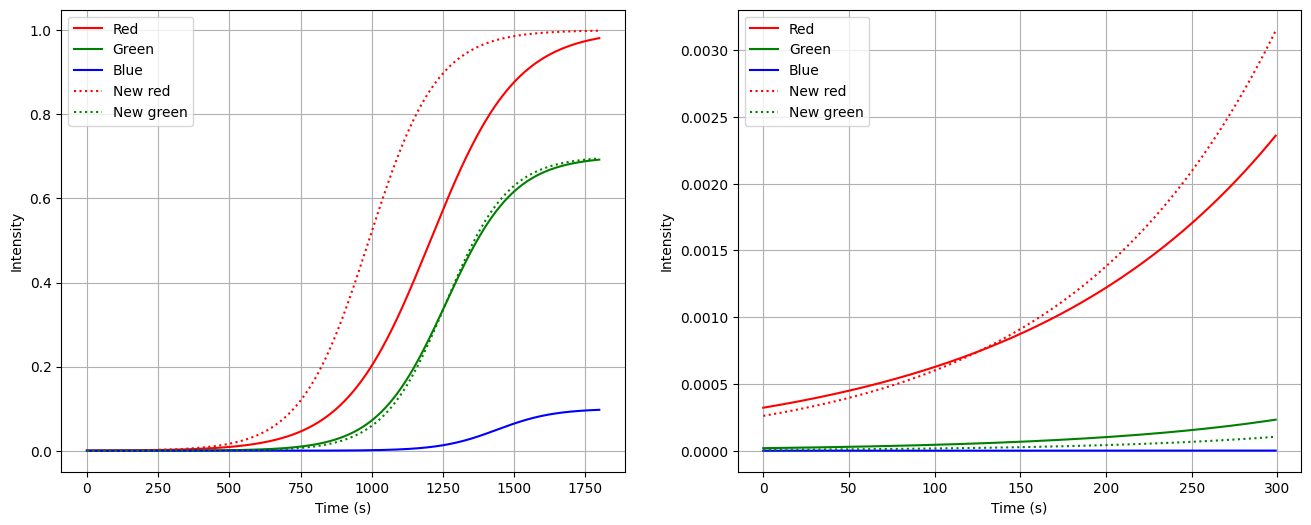

In [16]:
plot_calibration_curves([
    (1, .4, .67, 'red', 'Red', '-'),
    (.7, .5, .7, 'green', 'Green', '-'),
    (.1, .6, .8, 'blue', 'Blue', '-'),
    (1, .5, .55, 'red', 'New red', ':'),
    (.7, .55, .7, 'green', 'New green', ':'),
])